In [1]:
! pip install vizdoom

   ---------------------------------------- 15.5/15.5 MB 1.9 MB/s eta 0:00:00
   --------------------------------------- 953.9/953.9 kB 29.5 MB/s eta 0:00:00
   ---------------------------------------- 10.8/10.8 MB 27.3 MB/s eta 0:00:00


In [2]:
!cd github_stuff & git clone https://github.com/mwydmuch/ViZDoom

Cloning into 'ViZDoom'...
Updating files:  62% (1289/2062)
Updating files:  63% (1300/2062)
Updating files:  64% (1320/2062)
Updating files:  65% (1341/2062)
Updating files:  66% (1361/2062)
Updating files:  67% (1382/2062)
Updating files:  68% (1403/2062)
Updating files:  69% (1423/2062)
Updating files:  70% (1444/2062)
Updating files:  71% (1465/2062)
Updating files:  72% (1485/2062)
Updating files:  73% (1506/2062)
Updating files:  74% (1526/2062)
Updating files:  75% (1547/2062)
Updating files:  76% (1568/2062)
Updating files:  77% (1588/2062)
Updating files:  78% (1609/2062)
Updating files:  79% (1629/2062)
Updating files:  80% (1650/2062)
Updating files:  81% (1671/2062)
Updating files:  82% (1691/2062)
Updating files:  83% (1712/2062)
Updating files:  84% (1733/2062)
Updating files:  85% (1753/2062)
Updating files:  86% (1774/2062)
Updating files:  87% (1794/2062)
Updating files:  88% (1815/2062)
Updating files:  89% (1836/2062)
Updating files:  90% (1856/2062)
Updating files:  

In [3]:
# Import vizdoom for game env
from vizdoom import * 
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np

In [18]:
game = DoomGame()
game.load_config('C:\\Users\\bnand\\Documents\\SEM 6\\RL\\DOOM\\github_stuff\\ViZDoom\\scenarios\\basic.cfg')
game.init()

In [19]:
actions = np.identity(3, dtype=np.uint8)

In [20]:
actions[2]

array([0, 0, 1], dtype=uint8)

In [21]:
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [22]:
state = game.get_state()

In [13]:
state.game_variables

array([50.])

In [16]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: -196.0
reward: -4.0
reward: 99.0
Result: 95.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: 87.0
reward: -4.0
reward: 99.0
Result: 95.0
reward: -4.0
reward: 99.0
Result: 95.0
reward: -4

KeyboardInterrupt: 

In [17]:
game.close()

# Converting to GYM

In [23]:
! pip install gym

     -------------------------------------- 721.7/721.7 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827631 sha256=d2edd26a3d4c290c2efb1a8076de9e84082ada99b8cf9bc00e1478d09d49475b
  Stored in directory: c:\users\bnand\appdata\local\pip\cache\wheels\b9\22\6d\3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym


In [25]:
! pip install gym opencv-python


   ---------------------------------------- 38.6/38.6 MB 24.2 MB/s eta 0:00:00


In [26]:
# import dependencies
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [55]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('C:\\Users\\bnand\\Documents\\SEM 6\\RL\\DOOM\\github_stuff\\ViZDoom\\scenarios\\basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other things we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [59]:
state.shape

(100, 160, 1)

In [58]:
env = VizDoomGym(render=True)

In [50]:
env.step(2)

(array([[[55],
         [50],
         [59],
         ...,
         [57],
         [57],
         [66]],
 
        [[68],
         [65],
         [65],
         ...,
         [56],
         [67],
         [72]],
 
        [[49],
         [79],
         [66],
         ...,
         [79],
         [51],
         [29]],
 
        ...,
 
        [[75],
         [63],
         [62],
         ...,
         [44],
         [71],
         [60]],
 
        [[15],
         [48],
         [47],
         ...,
         [49],
         [69],
         [47]],
 
        [[22],
         [14],
         [26],
         ...,
         [57],
         [37],
         [39]]], dtype=uint8),
 -9.0,
 False,
 {'info': 46.0})

In [51]:
state = env.reset()

In [52]:
state

array([[[55],
        [50],
        [59],
        ...,
        [57],
        [57],
        [66]],

       [[68],
        [65],
        [65],
        ...,
        [56],
        [67],
        [72]],

       [[49],
        [79],
        [66],
        ...,
        [79],
        [51],
        [29]],

       ...,

       [[75],
        [63],
        [62],
        ...,
        [44],
        [71],
        [60]],

       [[15],
        [48],
        [47],
        ...,
        [49],
        [69],
        [47]],

       [[22],
        [14],
        [26],
        ...,
        [57],
        [37],
        [39]]], dtype=uint8)

In [60]:
np.moveaxis(state,0,-1).shape

(160, 1, 100)

In [61]:
! pip install matplotlib

In [62]:
from matplotlib import pyplot as plt

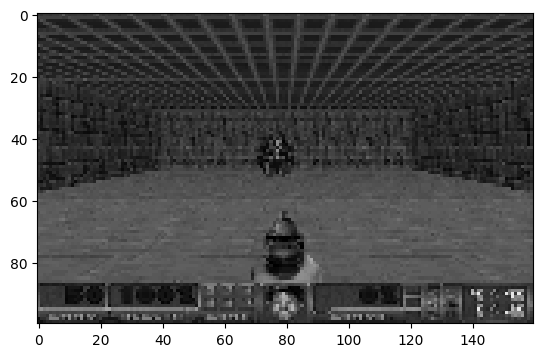

In [64]:
rgb_state = cv2.cvtColor(state, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_state)
plt.show()

In [65]:
state = env.close()